In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
%matplotlib inline  
import emcee
import math
import matplotlib
import scipy.optimize as op

hfont = {'fontname':'Times New roman'}

In [9]:
# real as real
min_sn = np.array([ 0.0,  1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 8.0, 10.0, 12.0, 14.0, 18.0, 22.0, 30.0])
max_sn = np.array([1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 8.0, 10.0, 12.0, 14.0, 18.0, 22.0, 30.0, 38.0])


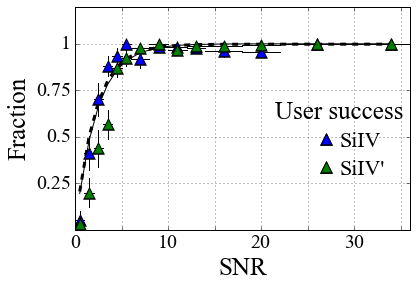

In [10]:
# plot the data
# x, y labels and title
plt.ylabel('Fraction', **hfont,  fontsize=25)
plt.xlabel('SNR', **hfont,  fontsize=25)
#plt.title('User success', **hfont,  fontsize=25)

# x and y ranges and scale
plt.xlim([0, 36])
plt.ylim([0,1.2])
value = np.array([0.0530303, 0.411111, 0.701031, 0.880597, 0.935065, 0.997959, 0.920455, 
                  0.984444, 0.983636, 0.980000, 0.962025, 0.957447,
                  1.00000,
                  1.00000])


mid_sn = min_sn + (max_sn - min_sn)/2.0
fit_mid_sn = mid_sn

z = 1.96


n = np.array([132, 90, 97, 67, 77, 49, 88, 90, 55, 50, 79, 47, 27, 29])
ns = n*value
nf = n - ns
error = z*pow(ns*nf/n, 0.5)/100.0
error[np.where(error < 0.001)] = 0.001
upper_bound = value + error
lower_bound = value - error
upper_bound[np.where(upper_bound > 1.0)] = 1.0

f  =  0.998*(1.0 - np.exp(-fit_mid_sn/2.16))
plt.plot(fit_mid_sn, f, 'k--', lw = 3, alpha = 1)

f  = 1.0*(1.0 - np.exp(-fit_mid_sn/2.3))
plt.plot(fit_mid_sn, f, 'k-', lw = 1, alpha = 1)


# x and y ticks
xlabels = ['0', ' ', '10', ' ', '20', ' ', '30']
plt.xticks([0, 5, 10, 15, 20, 25, 30, 35], 
            xlabels, **hfont, fontsize = 20)
ylabels = [' ', '0.25', '0.5', '0.75', '1']
plt.yticks([0, 0.25, 0.5, 0.75, 1.0], 
            ylabels, **hfont, fontsize = 20)

plt.grid(True)


# plot the vertical error bounds    
for i in range(0, len(min_sn)):
    plt.plot([mid_sn[i], mid_sn[i]], [upper_bound[i], lower_bound[i]], 'k-', lw=1.0)

# plot the bin boundaries
for i in range(0, len(min_sn)):
    plt.plot([min_sn[i], max_sn[i]], [value[i], value[i]], 'k-', lw=1.0)

    
# plot the results
plt.plot(mid_sn, value, 'k^', markersize=12, alpha=1.0)  
plt.plot(mid_sn, value, 'b^', markersize=10, alpha=1.0)   


value = np.array([0.0320000, 0.200000, 0.438095, 0.567164, 0.870492, 
                  0.923529, 0.979121, 0.999091, 0.966667, 0.986508, 
                  0.986667, 0.995000,  1.00000,  1.00000])

n = np.array([ 125,  95, 105,  67,  61,  68,  91,  88,  60,  63,  60,  40,  36,  21])
ns = n*value
nf = n - ns
error = z*pow(ns*nf/n, 0.5)/100.0
error[np.where(error < 0.001)] = 0.001
upper_bound = value + error
lower_bound = value - error
upper_bound[np.where(upper_bound > 1.0)] = 1.0

# plot the vertical error bounds    
for i in range(0, len(min_sn)):
    plt.plot([mid_sn[i], mid_sn[i]], [upper_bound[i], lower_bound[i]], 'k-', lw=1.0)

# plot the bin boundaries
for i in range(0, len(min_sn)):
    plt.plot([min_sn[i], max_sn[i]], [value[i], value[i]], 'k-', lw=1.0)

    
# plot the results
plt.plot(mid_sn, value, 'k^', markersize=12, alpha=1.0)  
plt.plot(mid_sn, value, 'g^', markersize=10, alpha=1.0)   



txt = plt.text(28.5, 0.45, "SiIV", **hfont,  fontsize=22)
plt.plot([27., 27.], [0.49, 0.49], 'k^', markersize=12, alpha=1.0)  
plt.plot([27., 27.], [0.49, 0.49], 'b^', markersize=10, alpha=1.0)   

txt = plt.text(28.5, 0.30, "SiIV'", **hfont,  fontsize=22)
plt.plot([27., 27.], [0.34, 0.34], 'k^', markersize=12, alpha=1.0)  
plt.plot([27., 27.], [0.34, 0.34], 'g^', markersize=10, alpha=1.0)   

txt = plt.text(21.5, 0.6, "User success", **hfont,  fontsize=25)






plt.savefig('si4_all_real_as_real.png', bbox_inches='tight', figsize=[24,12], dpi=500)

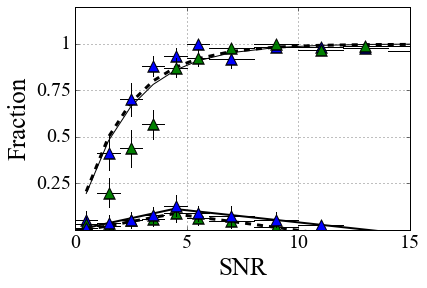

In [15]:
# plot the data
# real as real
min_sn = np.array([ 0.0,  1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 8.0, 10.0, 12.0, 14.0, 18.0, 22.0, 30.0])
max_sn = np.array([1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 8.0, 10.0, 12.0, 14.0, 18.0, 22.0, 30.0, 38.0])

# x, y labels and title
plt.ylabel('Fraction', **hfont,  fontsize=25)
plt.xlabel('SNR', **hfont,  fontsize=25)
#plt.title('User success', **hfont,  fontsize=25)

value = np.array([0.0530303, 0.411111, 0.701031, 0.880597, 0.935065, 0.997959, 0.920455, 
                  0.984444, 0.983636, 0.980000, 0.962025, 0.957447,
                  1.00000,
                  1.00000])


mid_sn = min_sn + (max_sn - min_sn)/2.0
fit_mid_sn = mid_sn

z = 1.96


n = np.array([132, 90, 97, 67, 77, 49, 88, 90, 55, 50, 79, 47, 27, 29])
ns = n*value
nf = n - ns
error = z*pow(ns*nf/n, 0.5)/100.0
error[np.where(error < 0.001)] = 0.001
upper_bound = value + error
lower_bound = value - error
upper_bound[np.where(upper_bound > 1.0)] = 1.0

f  =  0.998*(1.0 - np.exp(-fit_mid_sn/2.16))
plt.plot(fit_mid_sn, f, 'k--', lw = 3, alpha = 1)

f  = 1.0*(1.0 - np.exp(-fit_mid_sn/2.3))
plt.plot(fit_mid_sn, f, 'k-', lw = 1, alpha = 1)


plt.grid(True)


# plot the vertical error bounds    
for i in range(0, len(min_sn)):
    plt.plot([mid_sn[i], mid_sn[i]], [upper_bound[i], lower_bound[i]], 'k-', lw=1.0)

# plot the bin boundaries
for i in range(0, len(min_sn)):
    plt.plot([min_sn[i], max_sn[i]], [value[i], value[i]], 'k-', lw=1.0)

    
# plot the results
plt.plot(mid_sn, value, 'k^', markersize=12, alpha=1.0)  
plt.plot(mid_sn, value, 'b^', markersize=10, alpha=1.0)   


value = np.array([0.0320000, 0.200000, 0.438095, 0.567164, 0.870492, 
                  0.923529, 0.979121, 0.999091, 0.966667, 0.986508, 
                  0.986667, 0.995000,  1.00000,  1.00000])

n = np.array([ 125,  95, 105,  67,  61,  68,  91,  88,  60,  63,  60,  40,  36,  21])
ns = n*value
nf = n - ns
error = z*pow(ns*nf/n, 0.5)/100.0
error[np.where(error < 0.001)] = 0.001
upper_bound = value + error
lower_bound = value - error
upper_bound[np.where(upper_bound > 1.0)] = 1.0

# plot the vertical error bounds    
for i in range(0, len(min_sn)):
    plt.plot([mid_sn[i], mid_sn[i]], [upper_bound[i], lower_bound[i]], 'k-', lw=1.0)

# plot the bin boundaries
for i in range(0, len(min_sn)):
    plt.plot([min_sn[i], max_sn[i]], [value[i], value[i]], 'k-', lw=1.0)

    
# plot the results
plt.plot(mid_sn, value, 'k^', markersize=12, alpha=1.0)  
plt.plot(mid_sn, value, 'g^', markersize=10, alpha=1.0)   



# txt = plt.text(28.5, 0.45, "SiIV", **hfont,  fontsize=22)
# plt.plot([27., 27.], [0.49, 0.49], 'k^', markersize=12, alpha=1.0)  
# plt.plot([27., 27.], [0.49, 0.49], 'b^', markersize=10, alpha=1.0)   
# 
# txt = plt.text(28.5, 0.30, "SiIV'", **hfont,  fontsize=22)
# plt.plot([27., 27.], [0.34, 0.34], 'k^', markersize=12, alpha=1.0)  
# plt.plot([27., 27.], [0.34, 0.34], 'g^', markersize=10, alpha=1.0)   
# 
# txt = plt.text(21.5, 0.6, "User success", **hfont,  fontsize=25)


z = 1.96

min_sn = np.array([1.00, 2.00, 3.00, 4.00, 5.00, 6.00, 8.00])
max_sn = np.array([2.00, 3.00, 4.00, 5.00, 6.00, 8.00, 10.0])
mid_sn = 0.5*(max_sn - min_sn) + min_sn
value = np.array([0.0206186,  0.0515464,  0.0606061,  0.0910811,  0.0622581,  0.0466667,  0.0140741])



n = np.array([97, 97, 66, 74, 62, 90, 81])
ns = value*n
nf = n - ns
error = z*pow(ns*nf/n, 0.5)/100.0
error[np.where(error < 0.001)] = 0.001
upper_bound = value + error
lower_bound = value - error
upper_bound[np.where(upper_bound > 1.0)] = 1.0
common_x = (0.157 + 0.011)/(0.022 + 0.016)


x = np.array([0, 0.5, 1.5, 2.5, common_x])
best_fit = 0.022*x - 0.011
plt.plot(x, best_fit, 'k--', lw = 3, alpha = 1)

x = np.array([common_x, 5.5, 7.0, 9.0, 14.2])
best_fit = -0.016*x + 0.157
plt.plot(x, best_fit, 'k--', lw = 3, alpha = 1)


# plot the vertical error bounds    
for i in range(0, len(min_sn)):
    plt.plot([mid_sn[i], mid_sn[i]], [upper_bound[i], lower_bound[i]], 'k-', lw=1.0)
# plot the horizontal bounds    
for i in range(0, len(min_sn)):
    plt.plot([min_sn[i], max_sn[i]], [value[i], value[i]], 'k-', lw=1.0)
# plot the results
plt.plot(mid_sn, value, 'k^', markersize=12, alpha=1.0)  
plt.plot(mid_sn, value, 'g^', markersize=10, alpha=1.0)   


min_sn = np.array([0.00, 1.00, 2.00, 3.00, 4.00, 5.00, 6.00, 8.00, 10.0])
max_sn = np.array([1.00, 2.00, 3.00, 4.00, 5.00, 6.00, 8.00, 10.0, 12.0])
mid_sn = 0.5*(max_sn - min_sn) + min_sn
value = np.array([0.0103030, 0.0390476, 0.0533333, 0.0797015, 0.1304350, 0.0885185, 0.0766038, 0.0529412, 0.0268750])


n = np.array([132, 105,  90,  67,  69,  54, 106,  85,  64])
ns = value*n
nf = n - ns
error = z*pow(ns*nf/n, 0.5)/100.0
error[np.where(error == 0)] = 0.0278
upper_bound = value + error
lower_bound = value - error
upper_bound[np.where(upper_bound > 1.0)] = 1.0
common_x = (0.17 + 0.003)/(0.026 + 0.013)

# above : best_fit = 0.065*x + 0.019
x = np.array([0, 0.5, 1.5, 2.5, common_x])
best_fit = 0.026*x - 0.003
plt.plot(x, best_fit, 'k-', lw = 2, alpha = 1)

# below : best_fit = -0.025*x + 0.3
x = np.array([common_x, 5.5, 7.0, 9.0, 14.2])
best_fit = -0.013*x + 0.17
plt.plot(x, best_fit, 'k-', lw = 2, alpha = 1)


# plot the vertical error bounds    
for i in range(0, len(min_sn)):
    plt.plot([mid_sn[i], mid_sn[i]], [upper_bound[i], lower_bound[i]], 'k-', lw=1.0)

# plot the horizontal bounds    
for i in range(0, len(min_sn)):
    plt.plot([min_sn[i], max_sn[i]], [value[i], value[i]], 'k-', lw=1.0)

    
# plot the results
plt.plot(mid_sn, value, 'k^', markersize=12, alpha=1.0)  
plt.plot(mid_sn, value, 'b^', markersize=10, alpha=1.0)   

#txt = plt.text(9.5, 0.148, "SiIV", **hfont,  fontsize=22)
#plt.plot([9, 9], [0.155, 0.155], 'k^', markersize=12, alpha=1.0)  
#plt.plot([9, 9], [0.155, 0.155], 'b^', markersize=10, alpha=1.0)   
#
#txt = plt.text(9.5, 0.126, "SiIV'", **hfont,  fontsize=22)
#plt.plot([9, 9], [0.13, 0.13], 'k^', markersize=12, alpha=1.0)  
#plt.plot([9, 9], [0.13, 0.13], 'g^', markersize=10, alpha=1.0)   


#txt = plt.text(7.5, 0.17, "User failure", **hfont,  fontsize=25)



# x and y ranges and scale
plt.xlim([0, 15])
plt.ylim([0,1.2])

# x and y ticks
xlabels = ['0', '5', '10', '15']
plt.xticks([0, 5, 10, 15], 
            xlabels, **hfont, fontsize = 20)
ylabels = [' ', '0.25', '0.5', '0.75', '1']
plt.yticks([0, 0.25, 0.5, 0.75, 1.0], 
            ylabels, **hfont, fontsize = 20)



plt.savefig('si4_success_failure.png', bbox_inches='tight', figsize=[24,12], dpi=500)